In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.fugure_format = 'retina'

%load_ext autoreload

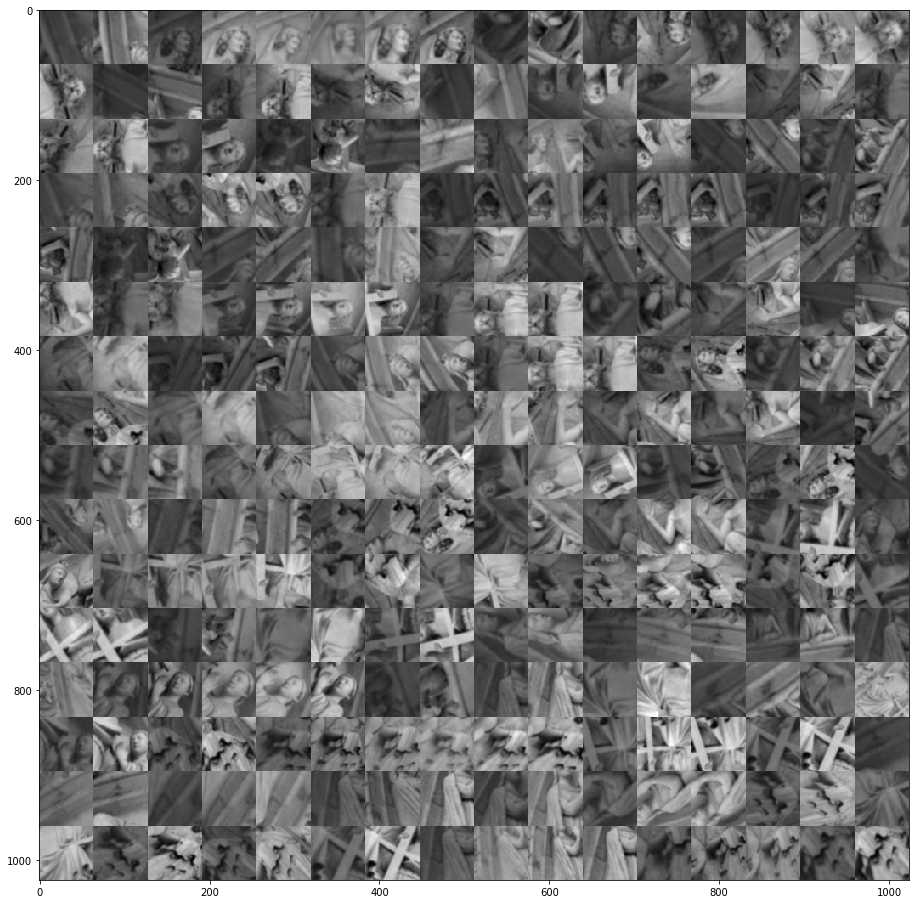

In [3]:
%autoreload
from utils import read_bitmap, read_patch, cut_patch_from_bitmap

DATA_ROOT = '../data'
NOTREDAME = f'{DATA_ROOT}/notredame'
LIBERTY = f'{DATA_ROOT}/liberty'

bmp = read_bitmap(NOTREDAME, 0)
plt.figure(figsize=(16, 16))
plt.imshow(bmp, shape=(16, 16), cmap='gray');

In [4]:
cut_patch_from_bitmap(bmp, 12).shape

(64, 64)

In [5]:
info_file = pd.read_csv(f'{NOTREDAME}/info.txt', delimiter=' ', names=['patch_id', 'unused'])
info_file[10:16]

,patch_id,unused
10,3,0
11,3,0
12,4,0
13,4,0
14,4,0
15,4,0


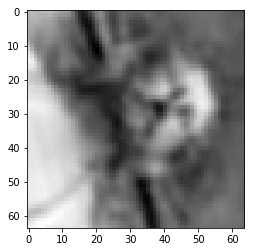

In [6]:
plt.imshow(read_patch(NOTREDAME, 12), cmap='gray');

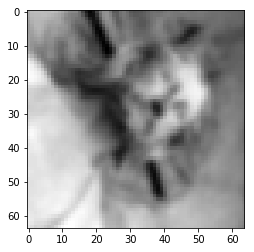

In [7]:
plt.imshow(read_patch(NOTREDAME, 13), cmap='gray');

In [8]:
match_file = pd.read_csv(f'{NOTREDAME}/m50_50000_50000_0.txt', delimiter=' ', 
    names=['patchID1', '3DpointID1', 'unused1', 'patchID2','3DpointID2', 'unused2', 'unused3'])
match_file.head()

,patchID1,3DpointID1,unused1,patchID2,3DpointID2,unused2,unused3
0,130856,39583,0,217903,67429,0,0
1,451659,142159,0,451660,142159,0,0
2,33399,10806,0,397913,125276,0,0
3,195398,60480,0,255973,77894,0,0
4,38293,12062,0,69767,20959,0,0


In [9]:
match_file = match_file.sample(frac=1)
match_file.head()

,patchID1,3DpointID1,unused1,patchID2,3DpointID2,unused2,unused3
7384,83155,24948,0,173724,52300,0,0
33404,220765,68234,0,405935,127749,0,0
14691,384952,120564,0,384953,120564,0,0
27112,18851,5945,0,18852,5945,0,0
10125,283080,85803,0,316942,97521,0,0


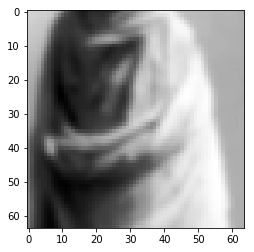

In [10]:
patch = read_patch(LIBERTY, 13)
plt.imshow(patch, cmap='gray');

In [11]:
patch

array([[209, 208, 208, ..., 181, 179, 178],
       [207, 207, 206, ..., 182, 180, 179],
       [206, 205, 204, ..., 182, 181, 180],
       ...,
       [138, 108,  84, ..., 180, 179, 179],
       [136, 106,  84, ..., 181, 179, 179],
       [134, 104,  82, ..., 181, 179, 179]], dtype=uint8)

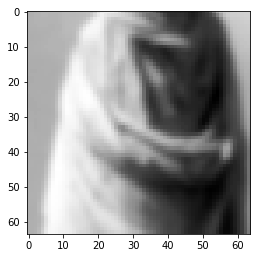

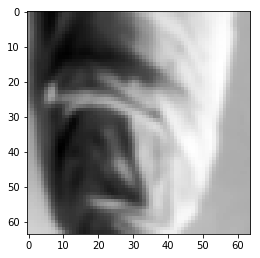

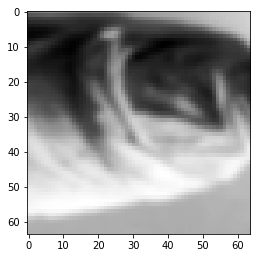

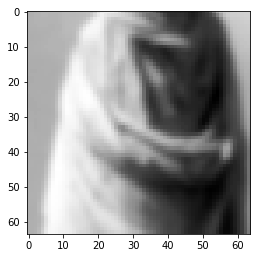

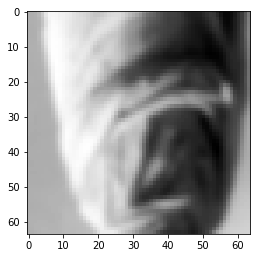

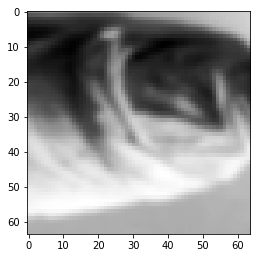

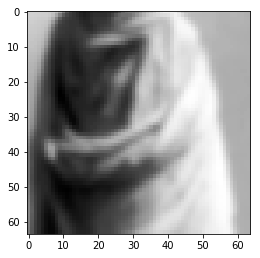

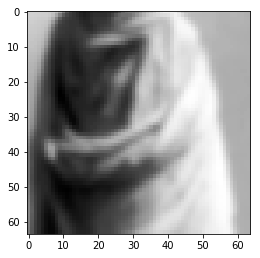

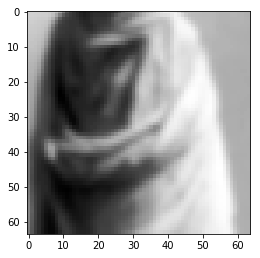

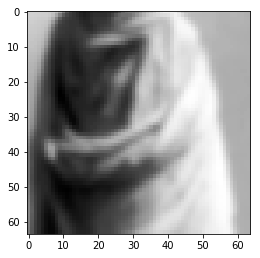

In [12]:
from imgaug import augmenters as iaa

aug = iaa.OneOf([
    iaa.Fliplr(0.3),
    iaa.Flipud(0.3),
    iaa.Affine(rotate=(90)),
    iaa.Affine(rotate=(180)),
    iaa.Affine(rotate=(270)),
    iaa.Noop()
])

patches = [patch] * 10
augmented = aug.augment_images(patches)

for p in augmented:
    plt.figure(figsize=(4, 5))
    plt.imshow(p, cmap='gray');
    plt.show()